these added to env-mod-regression-basic-py3.10

pip install --upgrade pip \
pip install numpy \
pip install pandas \
pip install  xlrd \
pip install seaborn \
pip install -U scikit-learn \
pip install statsmodels

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## View data

In [2]:
path = r'D:\Projects\Datasets\temperature vs consumption dataset.xls'
df = pd.read_excel(path, skiprows = 15, index_col = 'period')
df.head()

,temperature,hours before sunrise,hours before sunset,demand
period,,,,
1,8.4,6.016667,17.633333,496.0
2,8.1,5.516667,17.133333,535.0
3,7.8,5.016667,16.633333,511.0
4,7.5,4.516667,16.133333,496.0
5,7.3,4.016667,15.633333,490.0


In [3]:
df_desc = df.describe(include='all')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 52560 entries, 1 to 52560
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temperature           52560 non-null  float64
 1   hours before sunrise  52560 non-null  float64
 2   hours before sunset   52560 non-null  float64
 3   demand                48240 non-null  float64
dtypes: float64(4)
memory usage: 2.0 MB


In [4]:
df_desc

,temperature,hours before sunrise,hours before sunset,demand
count,52560.000000,52560.000000,52560.000000,48240.000000
mean,10.846355,-5.877032,6.392816,1019.103669
std,6.211591,7.081078,7.089678,445.325405
min,-7.000000,-19.766667,-7.616667,301.000000
25%,6.600000,-11.883333,0.383333,675.000000
50%,10.800000,-5.883333,6.383333,948.000000
75%,15.000000,0.116667,12.383333,1243.000000
max,35.300000,8.083333,20.333333,2549.000000


In [5]:
test = df[df['demand'].isnull()]
train = df[~df['demand'].isnull()]
test.describe(), train.describe()

(       temperature  hours before sunrise  hours before sunset  demand
 count  4320.000000           4320.000000          4320.000000     0.0
 mean     15.183611             -6.917963             7.472593     NaN
 std       3.842957              6.957626             6.974383     NaN
 min       5.400000            -19.666667            -5.800000     NaN
 25%      12.700000            -12.920833             1.479167     NaN
 50%      15.200000             -6.925000             7.475000     NaN
 75%      17.900000             -0.929167            13.470833     NaN
 max      29.200000              5.983333            20.316667     NaN,
         temperature  hours before sunrise  hours before sunset        demand
 count  48240.000000          48240.000000         48240.000000  48240.000000
 mean      10.457944             -5.783814             6.296119   1019.103669
 std        6.235496              7.084642             7.091967    445.325405
 min       -7.000000            -19.766667      

C:\Users\User\AppData\Local\Temp\ipykernel_5660\1006012815.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrows, nrows, idx + 1)


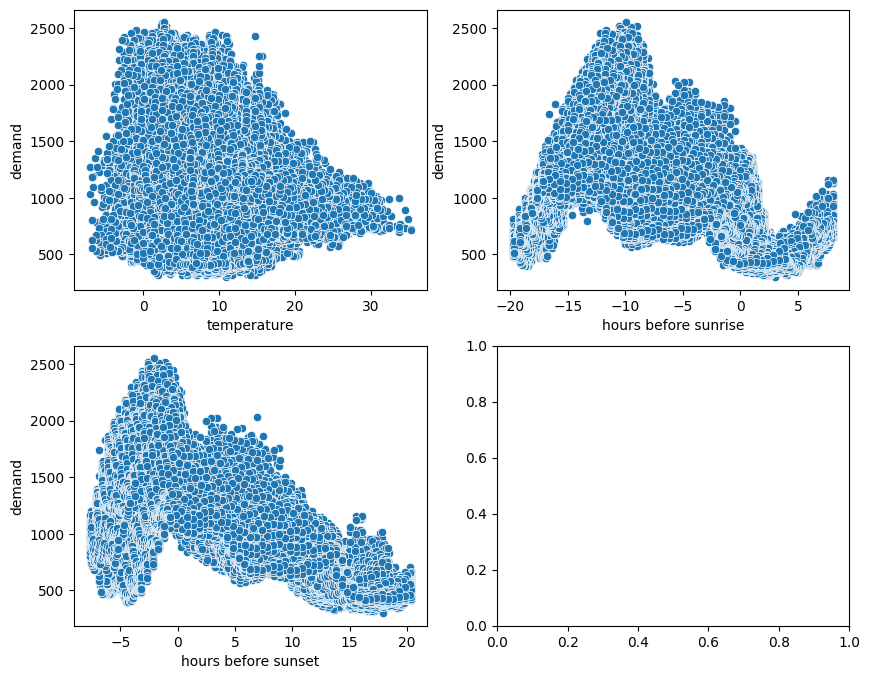

In [7]:
nrows = np.ceil(np.sqrt(len(train.columns) - 1 )).astype(int)
plt.subplots(figsize=(10, 8))
for idx, i  in enumerate(train.columns):
    plt.subplot(nrows, nrows, idx + 1)
    if i == "demand": 
        pass
    else:
        sns.scatterplot(x = i, y = "demand", data = train)


plt.show()

<Figure size 1000x800 with 0 Axes>

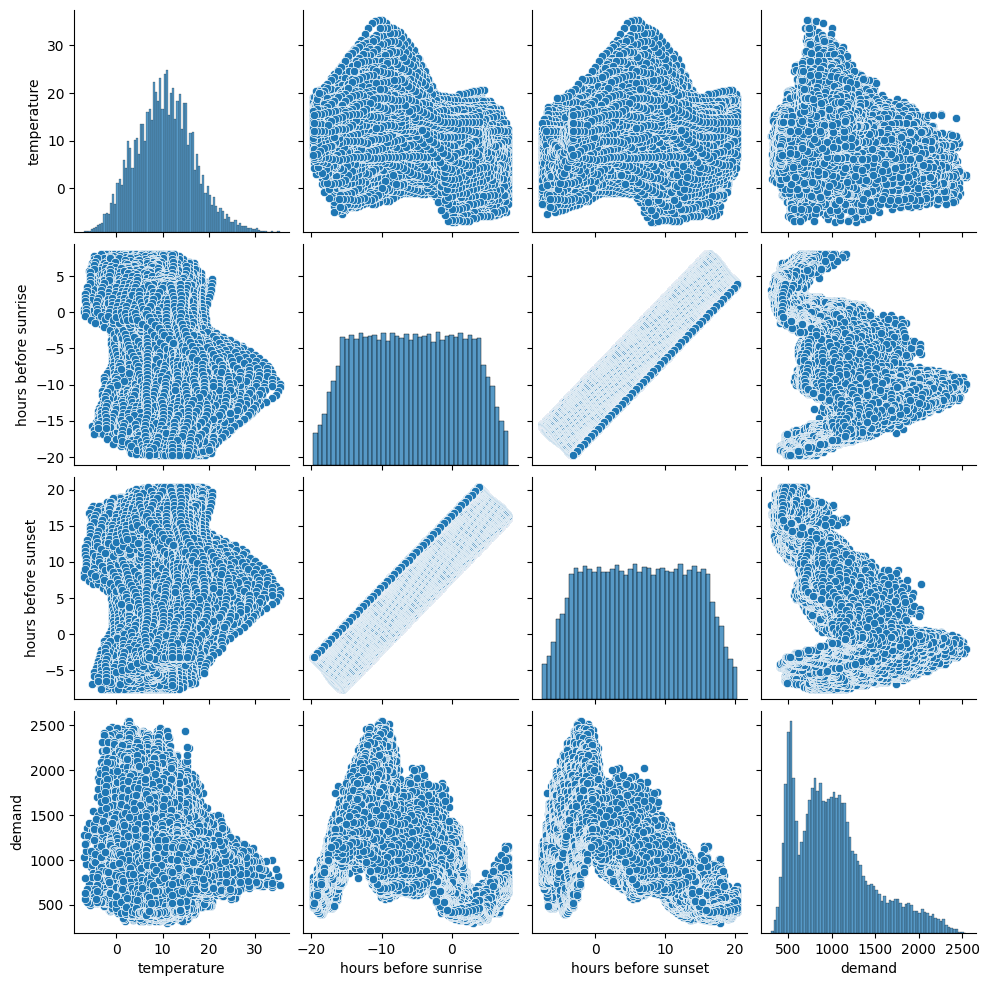

In [8]:
plt.figure(figsize=(10,8))
sns.pairplot(train)

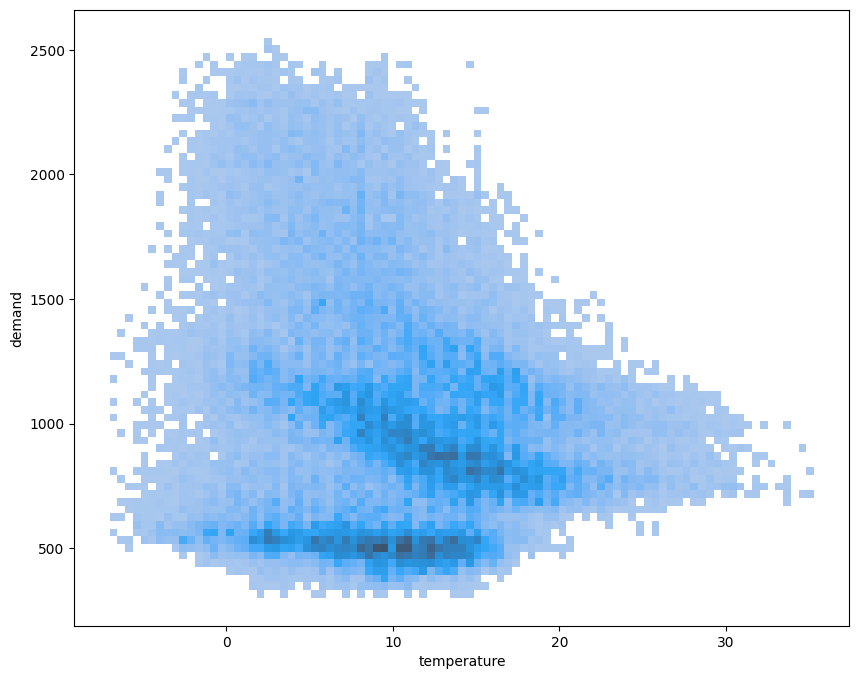

In [9]:
plt.figure(figsize=(10,8))
sns.histplot(x= "temperature", y= "demand", data=train) 
plt.show()

## Explore

In [10]:
df1 = train.copy()
df1.head()

,temperature,hours before sunrise,hours before sunset,demand
period,,,,
1,8.4,6.016667,17.633333,496.0
2,8.1,5.516667,17.133333,535.0
3,7.8,5.016667,16.633333,511.0
4,7.5,4.516667,16.133333,496.0
5,7.3,4.016667,15.633333,490.0


In [11]:
df1['temp_cat'] = pd.cut(df.temperature, bins=4, labels=np.arange(4), right=False) 
df1['daytime_cat'] = pd.cut(df["hours before sunset"], bins=4, labels=np.arange(4), right=False) 

In [12]:
df_temp = pd.DataFrame({ 'very_low_temp' : df1.query('temp_cat == 0')['temperature'].describe(), \
    'low_temp' : df1.query('temp_cat == 1')['temperature'].describe(),  \
        'med_temp' : df1.query('temp_cat == 2')['temperature'].describe(), \
            'high_temp' : df1.query('temp_cat == 3')['temperature'].describe() }) 
df_temp

,very_low_temp,low_temp,med_temp,high_temp
count,6968.000000,28126.000000,12324.000000,822.000000
mean,0.951478,9.220842,17.533853,27.285523
std,2.001930,2.892983,2.648354,2.001655
min,-7.000000,3.600000,14.200000,24.800000
25%,-0.200000,6.900000,15.300000,25.700000
50%,1.400000,9.400000,16.900000,26.800000
75%,2.500000,11.600000,19.200000,28.500000
max,3.500000,14.100000,24.700000,35.300000


In [13]:
df_hours = pd.DataFrame({ 'hours after sunset' : df1.query('daytime_cat == 0')['hours before sunset'].describe(), \
    '6 hours before sunset' : df1.query('daytime_cat == 1')['hours before sunset'].describe(),  \
        '6 to 13 hours before sunset' : df1.query('daytime_cat == 2')['hours before sunset'].describe(), \
            '13 to 20 hours before sunset' : df1.query('daytime_cat == 3')['hours before sunset'].describe() }) 
df_hours

,hours after sunset,6 hours before sunset,6 to 13 hours before sunset,13 to 20 hours before sunset
count,10197.000000,14045.000000,14049.000000,9949.000000
mean,-3.393331,2.863028,9.851594,16.052901
std,1.796121,2.017622,2.018189,1.775745
min,-7.616667,-0.616667,6.366667,13.350000
25%,-4.683333,1.116667,8.100000,14.583333
50%,-3.166667,2.866667,9.850000,15.833333
75%,-1.900000,4.616667,11.600000,17.316667
max,-0.633333,6.350000,13.333333,20.333333


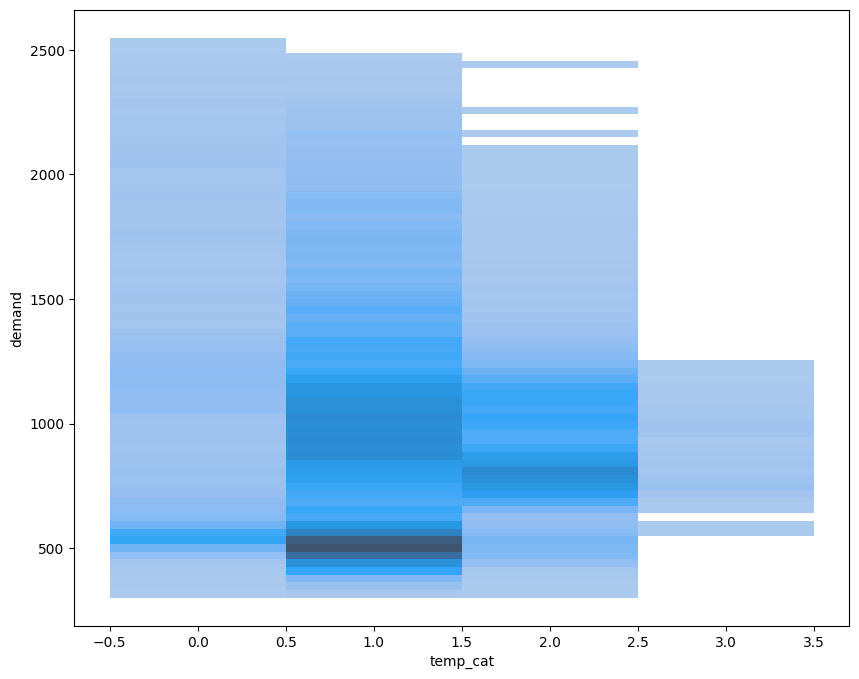

In [14]:
plt.figure(figsize=(10,8))
sns.histplot(x= "temp_cat", y= "demand", data=df1) 
plt.show()

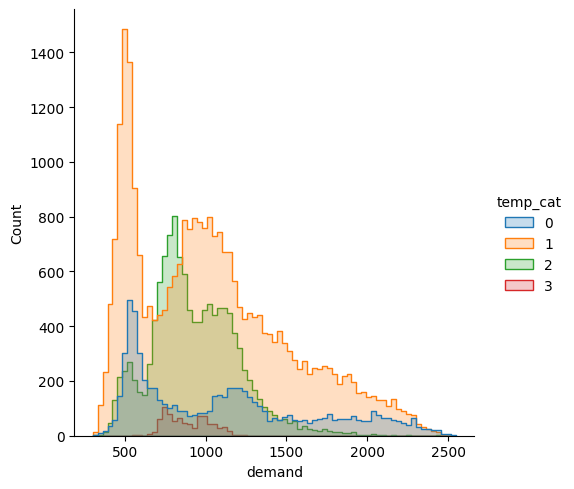

In [15]:
sns.displot(df1, x="demand", hue="temp_cat", element="step")

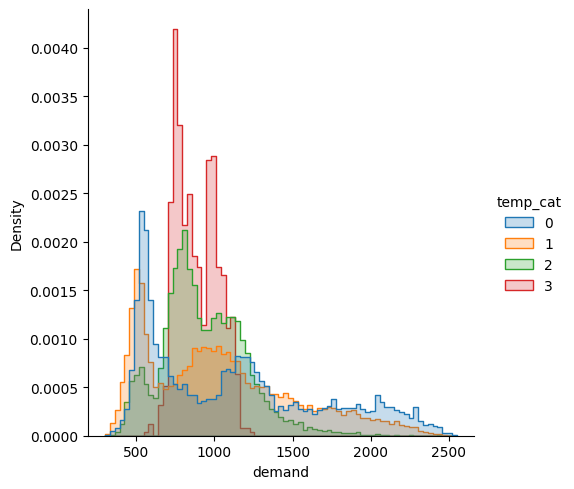

In [16]:
sns.displot(df1, x="demand", hue="temp_cat", element="step", stat="density", common_norm=False)

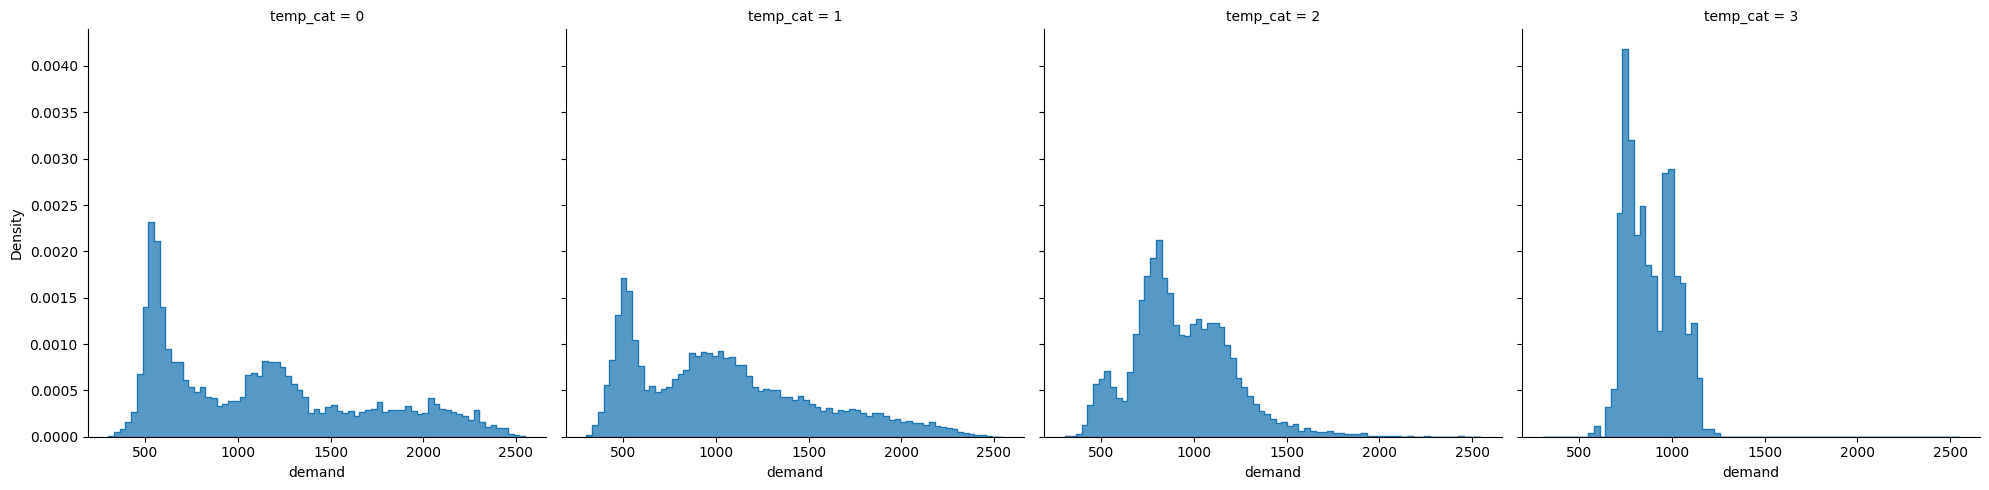

In [17]:
sns.displot(df1, x="demand", col="temp_cat", element="step",stat="density", common_norm=False)

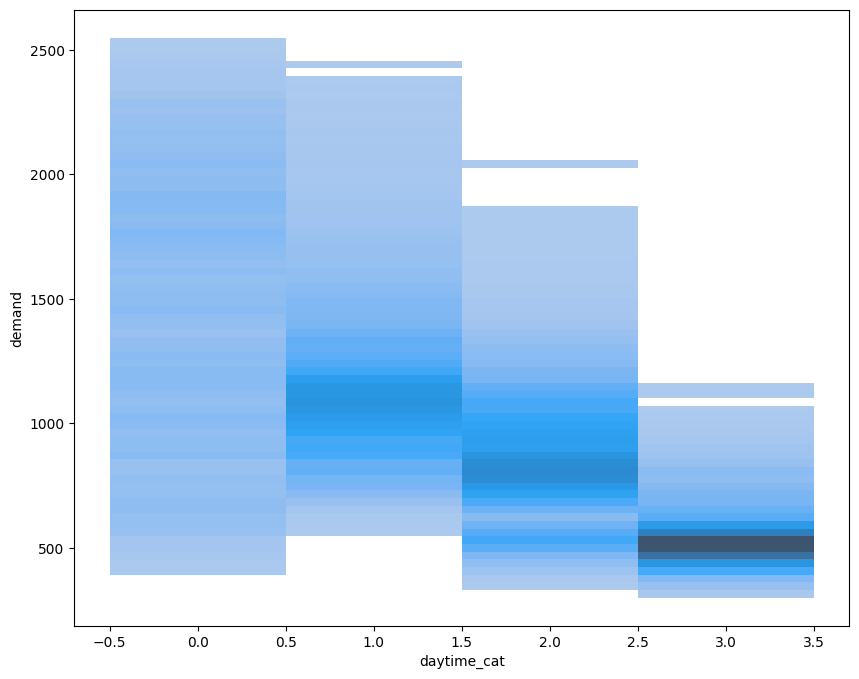

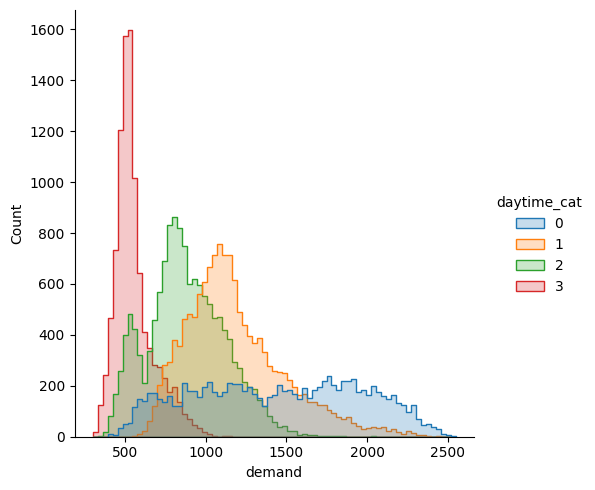

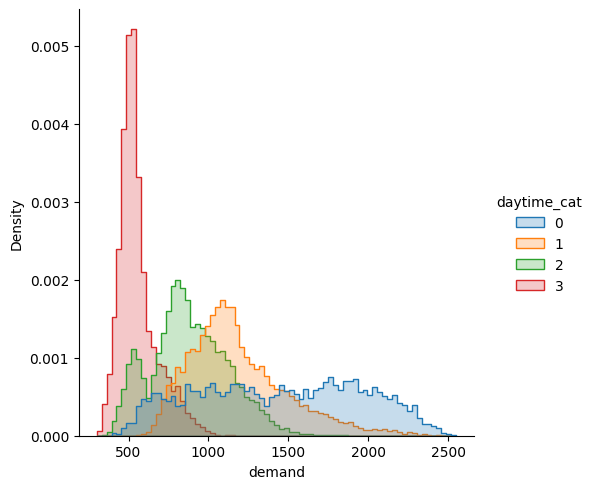

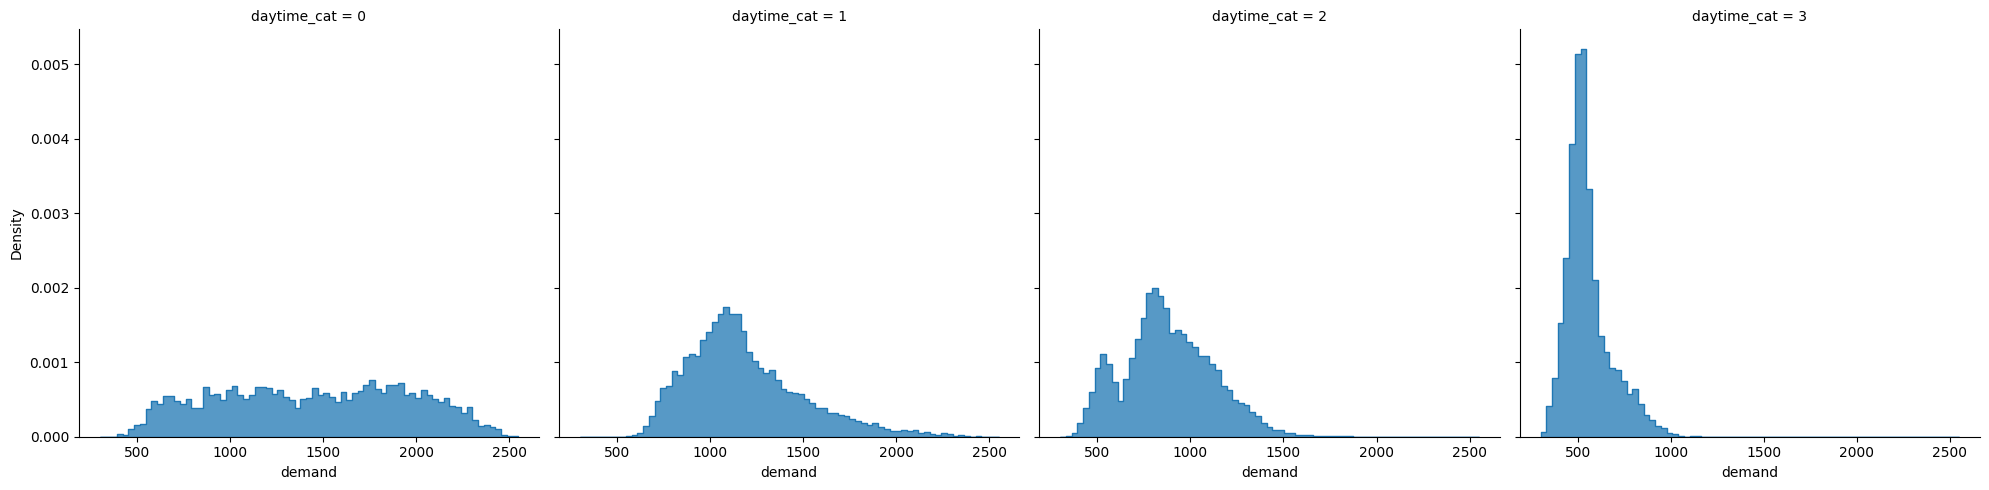

In [18]:
plt.figure(figsize=(10,8))
sns.histplot(x= "daytime_cat", y= "demand", data=df1) 
sns.displot(df1, x="demand", hue="daytime_cat", element="step")
sns.displot(df1, x="demand", hue="daytime_cat", element="step",stat="density", common_norm=False)
sns.displot(df1, x="demand", col="daytime_cat", element="step",stat="density", common_norm=False)
plt.show()

In [19]:
# Data was corrupted due to an unexpected failure of this machine. Code was lost but the plots have been saved for demand vs hours before sunset

## Relate 

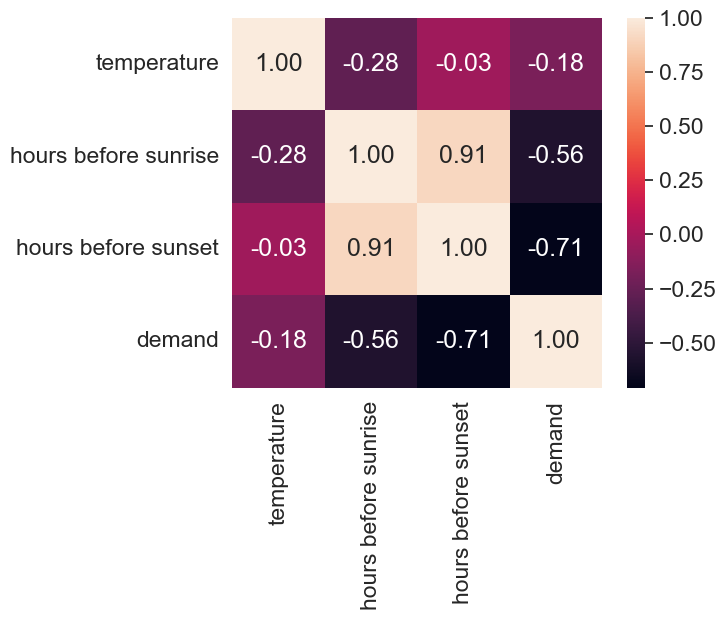

In [20]:
correlation = train.corr(method='pearson')
col = correlation.index
cor = np.corrcoef(train[col].values.T)
sns.set(font_scale=1.5)
heatmap = sns.heatmap(cor, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=col.values, xticklabels=col.values)
plt.show()

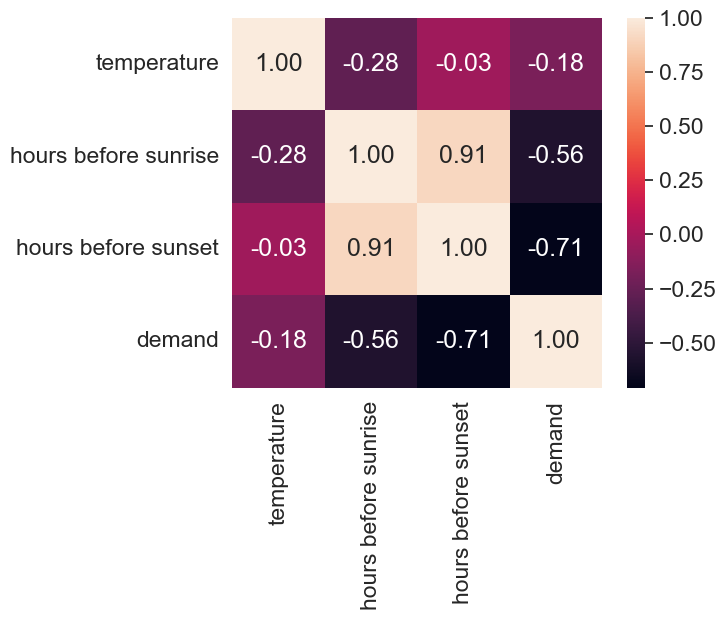

In [21]:
cor_spear = train.corr(method= 'spearman')
col2 = cor_spear.index
cor2 = np.corrcoef(train[col2].values.T)
sns.set(font_scale=1.5)
heatmap = sns.heatmap(cor2, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=col2.values, xticklabels=col2.values)
plt.show()

In [22]:
# There are no outliers in the parameters to shake up pearson's method so we see similar results in two correlation methods
# high negative correlation between demand and hours b4 sunset

In [37]:
from scipy import stats
corr, _ = stats.spearmanr(train.demand, train.temperature)
corr

-0.12372741634037587

In [38]:
corr, _ = stats.spearmanr(train.demand, train['hours before sunrise'])
corr

-0.6282387119419244

In [39]:
corr, _ = stats.spearmanr(train.demand, train['hours before sunset'])
corr

-0.7462483005464787

In [44]:
import statsmodels.api as sm
X_train = train.drop(['demand'], axis = 1)
Y_train = train['demand']

mod = sm.OLS(Y_train, X_train)
result = est.fit()
print(result.summary())

# slope, intercept, r_value, p_value, std_err = stats.linregress(X_train["hours before sunset"], Y_train)
# p_value

                                 OLS Regression Results                                
Dep. Variable:                 demand   R-squared (uncentered):                   0.813
Model:                            OLS   Adj. R-squared (uncentered):              0.813
Method:                 Least Squares   F-statistic:                          6.992e+04
Date:                Tue, 29 Nov 2022   Prob (F-statistic):                        0.00
Time:                        19:36:56   Log-Likelihood:                     -3.6636e+05
No. Observations:               48240   AIC:                                  7.327e+05
Df Residuals:                   48237   BIC:                                  7.328e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

## Model

In [45]:
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [47]:
X_train = train.drop(['demand'], axis = 1)
Y_train = train['demand']

In [48]:
pipelines = []
pipelines.append(('Linear', Pipeline([('Scaler', StandardScaler()),('Linear',LinearRegression())])))
# pipelines.append(('Logistic', Pipeline([('Scaler', StandardScaler()),('Logistic', LogisticRegression())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('GBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=5)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print(msg)

('Linear', 0.4474822248920736, 0.08944899732434312)
('KNN', 0.8588498746963099, 0.029092792497166238)
('GBM', 0.8671935403006706, 0.031097249087808976)


In [49]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([200,300,400]))
model = GradientBoostingRegressor()
kfold = KFold(n_splits=10)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

0.866176 (0.044346) with: {'n_estimators': 200}
0.868902 (0.043182) with: {'n_estimators': 300}
0.870228 (0.042831) with: {'n_estimators': 400}
Best: 0.870228 using {'n_estimators': 400}


In [50]:
X_test = test.drop(['demand'], axis = 1)
Y_test = test['demand']

In [51]:
from sklearn.metrics import mean_squared_error

scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
model = GradientBoostingRegressor(n_estimators=400)
model.fit(rescaled_X_train, Y_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(rescaled_X_test)


## Output

In [60]:
prediction_df = pd.DataFrame({'Y_predicted': predictions})
prediction_df.to_csv('demand predictions', index = False)
len(predictions), predictions

(4320,
 array([516.47442685, 509.23927414, 491.12375445, ..., 831.93615588,
        715.39734394, 573.05508196]))

In [61]:
prediction_df = pd.read_csv('demand predictions')
prediction_df.head()

,Y_predicted
0,516.474427
1,509.239274
2,491.123754
3,479.569093
4,484.128127


In [62]:
test_set_predictions = X_test.copy()
test_set_predictions['demand_predictions'] = predictions

test_set_predictions.head()

,temperature,hours before sunrise,hours before sunset,demand_predictions
period,,,,
48241,11.9,3.833333,20.316667,516.474427
48242,12.0,3.333333,19.816667,509.239274
48243,12.1,2.833333,19.316667,491.123754
48244,12.0,2.333333,18.816667,479.569093
48245,11.9,1.833333,18.316667,484.128127


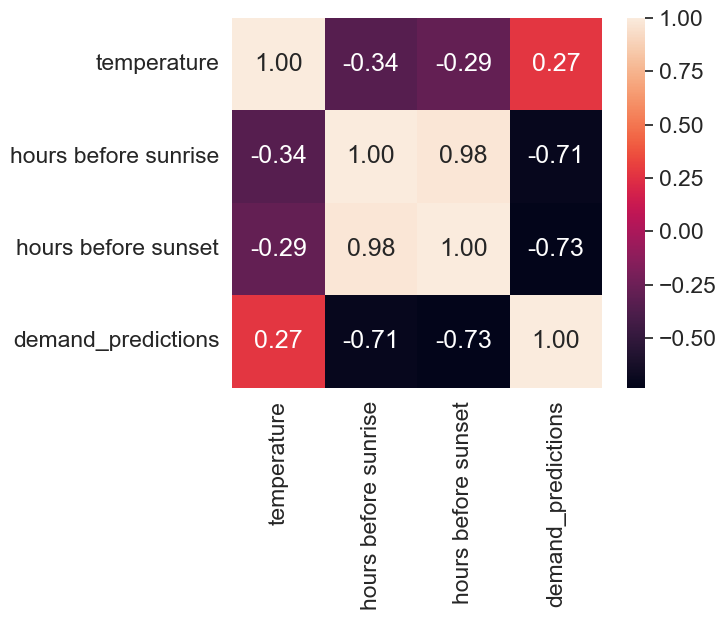

In [63]:
correlation = test_set_predictions.corr(method='pearson')
col = correlation.index
cor = np.corrcoef(test_set_predictions[col].values.T)
sns.set(font_scale=1.5)
heatmap = sns.heatmap(cor, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=col.values, xticklabels=col.values)
plt.show()

In [ ]:
# similar correlations direction and strengths except for temperatures where the realtionship has reversed